In [9]:
#import matplotlib

#matplotlib.style.use('fast')

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from data import gaia_df
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [10]:
gaia_df.head()

gaia_df['x'] = gaia_df["cartesian"].apply(lambda val: val[0])
gaia_df['y'] = gaia_df["cartesian"].apply(lambda val: val[1])
gaia_df['z'] = gaia_df["cartesian"].apply(lambda val: val[2])

/var/folders/f6/j3dwv37956q0mmv40x0xlzmr0000gn/T/ipykernel_12929/3383928859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_df['x'] = gaia_df["cartesian"].apply(lambda val: val[0])
/var/folders/f6/j3dwv37956q0mmv40x0xlzmr0000gn/T/ipykernel_12929/3383928859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaia_df['y'] = gaia_df["cartesian"].apply(lambda val: val[1])
/var/folders/f6/j3dwv37956q0mmv40x0xlzmr0000gn/T/ipykernel_12929/3383928859.py:5: SettingWithCopyWarning: 
A value is trying to be s

In [11]:
def estimate_distance(df):
    return np.sqrt(df['x']**2 + df['y']**2 + df['z'])



In [12]:
n_iterations = 1000
bootstrap_estimates = []

for _ in range(n_iterations): 
    sample = gaia_df.sample(frac=0.5, replace=True)
    estimate = estimate_distance(sample)
    bootstrap_estimates.append(estimate)

bootstrap_estimates = np.array(bootstrap_estimates)



In [13]:
bootstrap_estimates = bootstrap_estimates[~np.isnan(bootstrap_estimates)]
bootstrap_estimates

array([1763.8509367 , 1761.9679582 ,  570.11320868, ..., 1388.42947361,
         96.56312578, 4513.88969664])

In [14]:
q1 = np.percentile(bootstrap_estimates, 25)
q3 = np.percentile(bootstrap_estimates, 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_estimates = bootstrap_estimates[(bootstrap_estimates >= lower_bound) & (bootstrap_estimates <= upper_bound)]
filtered_estimates

array([1763.8509367 , 1761.9679582 ,  570.11320868, ..., 1388.42947361,
         96.56312578, 4513.88969664])

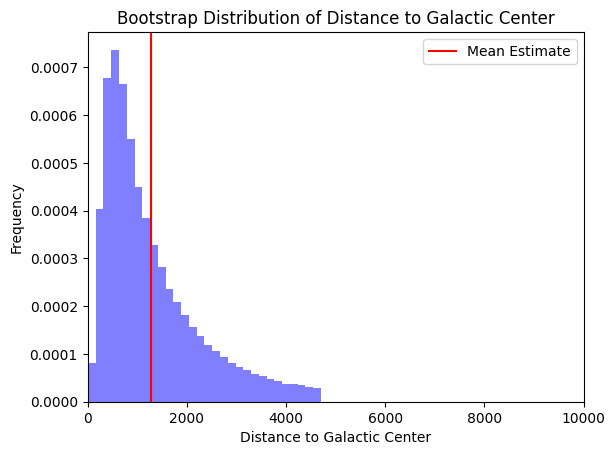

In [18]:
plt.hist(filtered_estimates, bins=30, density=True, alpha=0.5, color='blue')
plt.axvline(np.mean(filtered_estimates), color = 'red', label = 'Mean Estimate')
plt.xlim(0, 10_000)
plt.xlabel('Distance to Galactic Center')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Distance to Galactic Center')
plt.legend()
plt.show()

In [19]:
mean_estimate = np.mean(filtered_estimates) / 1000
std_estimate = np.std(filtered_estimates)
print(f"Mean Estimate: {mean_estimate}")
print(f"Standard Deviation of Estimates: {std_estimate}")

Mean Estimate: 1.2873354595970306
Standard Deviation of Estimates: 976.6052488514894


In [20]:
accepted_value = 8.178
lower_bound = mean_estimate - std_estimate
upper_bound = mean_estimate + std_estimate

consistent = lower_bound <= accepted_value <= upper_bound

print(f"Accepted Value: {accepted_value}")
print(f"Your Estimate: {mean_estimate:.3f} +- {std_estimate:.3f}")
print(f"Range: [{lower_bound:.3f}, {upper_bound:.3f}]")
print(f"Is the accepted value consistent with your estimate? {'Yes' if consistent else 'No'}")

Accepted Value: 8.178
Your Estimate: 1.287 +- 976.605
Range: [-975.318, 977.893]
Is the accepted value consistent with your estimate? Yes
